In [150]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
# create a data frame from CSV file
file_path = "used_cars (2).csv"
df=pd.read_csv(file_path)


In [152]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


Prepare the dataframe for power to price ratio analysis

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [154]:
#create a copy 
df_processed = df.copy()

In [155]:
#convert the 'price','milage' columns from string to numeric
df_processed['price_numeric $'] = df_processed['price'].replace('[\$,]', '', 
regex=True).astype(float)
df_processed['milage_numeric'] = df_processed['milage'].str.replace(r'[^0-9.]', '', 
regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/670843459.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_processed['price_numeric $'] = df_processed['price'].replace('[\$,]', '',


In [156]:
#convert the 'engine' column from string to numeric and clean the data
def extract_hp(engine_str):
    import re
    try:
        # Look for a pattern like "300.0HP"
        hp_pattern = re.search(r'(\d+\.?\d*)HP', str(engine_str).upper())
        if hp_pattern:
            return float(hp_pattern.group(1))
    except:
        return None

In [157]:
df_processed['engine_hp HP'] = df_processed['engine'].apply(extract_hp)

In [158]:
df_processed.dropna(subset=['price_numeric $', 'milage_numeric','engine_hp HP'], inplace=True)


In [159]:
#drop the unnecessary columns
df_processed=df_processed.drop(['price', 'milage','transmission','ext_col','accident','clean_title','int_col','engine'], axis=1)

In [160]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3201 entries, 0 to 4008
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3201 non-null   object 
 1   model            3201 non-null   object 
 2   model_year       3201 non-null   int64  
 3   fuel_type        3064 non-null   object 
 4   price_numeric $  3201 non-null   float64
 5   milage_numeric   3201 non-null   float64
 6   engine_hp HP     3201 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 200.1+ KB


power_to_price means : how much horspower we get for every $1000 spend on a car
so if the power_to_price ratio is 10 ,meaning we get 10HP for each $1000.

In [161]:
df_processed['power_to_price'] = (df_processed['engine_hp HP'] / df_processed['price_numeric $']*1000).round(2)
df_processed['power_to_price'] = df_processed['power_to_price'].replace([np.inf, -np.inf], np.nan)
df_processed.dropna(subset=['power_to_price'], inplace=True)

df_processed['power_to_price'].describe()

count    3201.000000
mean       14.410103
std        11.178915
min         0.130000
25%         7.470000
50%        11.030000
75%        17.650000
max       151.000000
Name: power_to_price, dtype: float64

In [162]:
#calculate vehicle age
current_year=2025
df_processed['vehicle_age'] = current_year - df_processed['model_year']
df_processed['vehicle_age'].describe()

count    3201.000000
mean       10.364261
std         5.905857
min         1.000000
25%         6.000000
50%         9.000000
75%        14.000000
max        29.000000
Name: vehicle_age, dtype: float64

In [163]:
#create age groups
df_processed['age_group'] = pd.cut(df_processed['vehicle_age'], bins=[0, 5, 10, 15, 20, 25, 30], labels=['0-5 years', '6-10 years', '11-15 years', '16-20 years', '21-25 years', '26+ years'])
df_processed.head()

,brand,model,model_year,fuel_type,price_numeric $,milage_numeric,engine_hp HP,power_to_price,vehicle_age,age_group
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,10300.0,51000.0,300.0,29.13,12,11-15 years
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,15500.0,88900.0,354.0,22.84,10,6-10 years
6,Audi,S3 2.0T Premium Plus,2017,Gasoline,31000.0,84000.0,292.0,9.42,8,6-10 years
7,BMW,740 iL,2001,Gasoline,7300.0,242000.0,282.0,38.63,24,21-25 years
8,Lexus,RC 350 F Sport,2021,Gasoline,41927.0,23436.0,311.0,7.42,4,0-5 years


In [164]:
#save the processed data to a new CSV file
df_processed.to_csv("processed_used_cars.csv", index=False)

Brand-Level Analysis

In [165]:
brand_ratios = df_processed.groupby('brand').agg({'power_to_price':'mean','price_numeric $':'mean','engine_hp HP':'mean','milage_numeric':'mean','model_year':'mean'}).reset_index()

In [166]:
brand_ratios_sorted = brand_ratios.sort_values(by='power_to_price', ascending=False)


Text(0.5, 1.0, 'Power to Price Ratio by Brand')

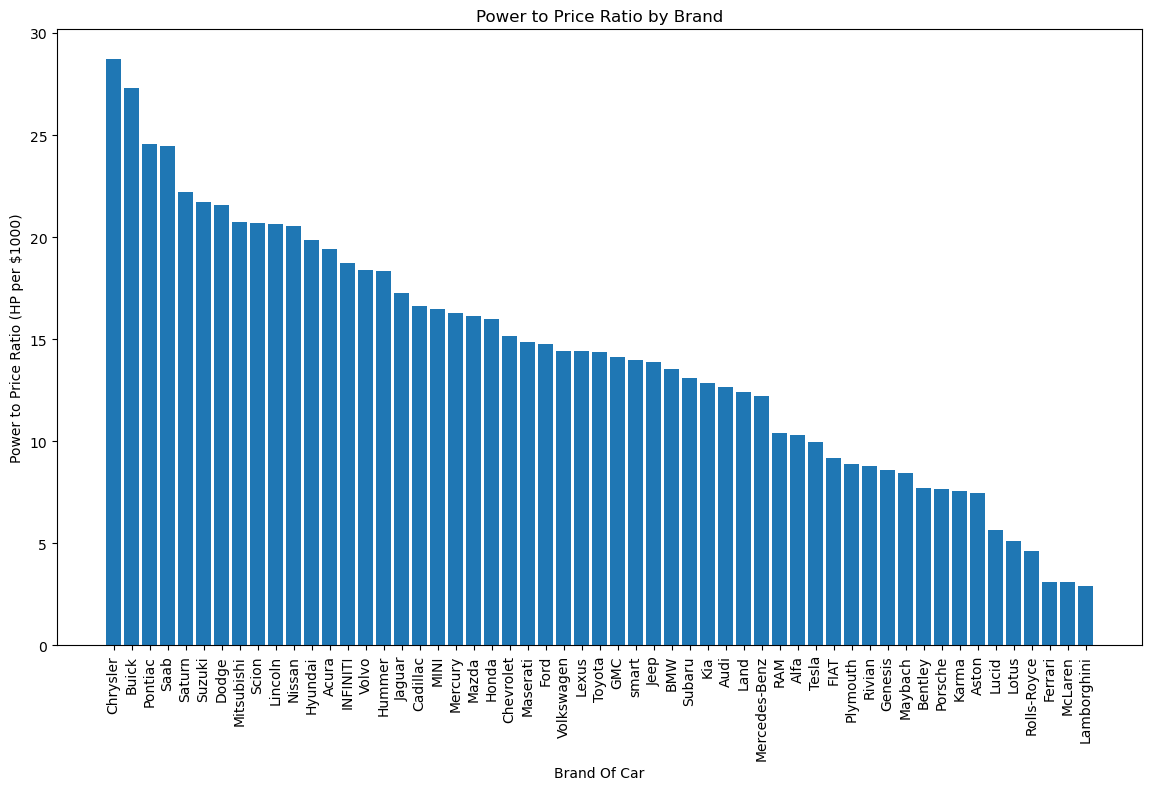

In [167]:
plt.figure(figsize=(14, 8))
plt.bar(brand_ratios_sorted['brand'], brand_ratios_sorted['power_to_price'])
plt.xlabel('Brand Of Car')
plt.xticks(rotation=90)
plt.ylabel('Power to Price Ratio (HP per $1000)')
plt.title('Power to Price Ratio by Brand')

Compare 10 highest and lowest brand /power_to_price ratio for Brand-Level Analysis

In [168]:
top_brands= brand_ratios_sorted.head(10)
lesser_brands= brand_ratios_sorted.tail(10)



/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/3918587056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='power_to_price', y='brand', data=top_brands, palette='viridis')


Text(0.5, 1.0, 'Top 15 Brands by Power to Price Ratio')

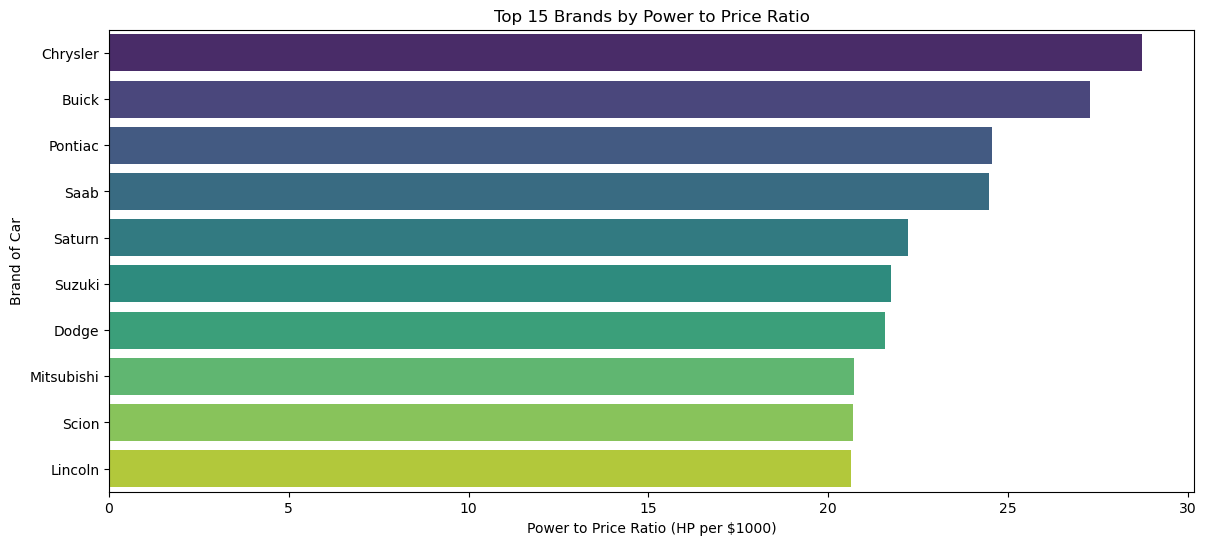

In [169]:
plt.figure(figsize=(14, 6))
sns.barplot(x='power_to_price', y='brand', data=top_brands, palette='viridis')
plt.xlabel('Power to Price Ratio (HP per $1000)')

plt.ylabel('Brand of Car')
plt.title('Top 15 Brands by Power to Price Ratio')

/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/2616451726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='power_to_price', y='brand', data=lesser_brands, palette='viridis')


Text(0.5, 1.0, 'Top 15 Brands by Power to Price Ratio')

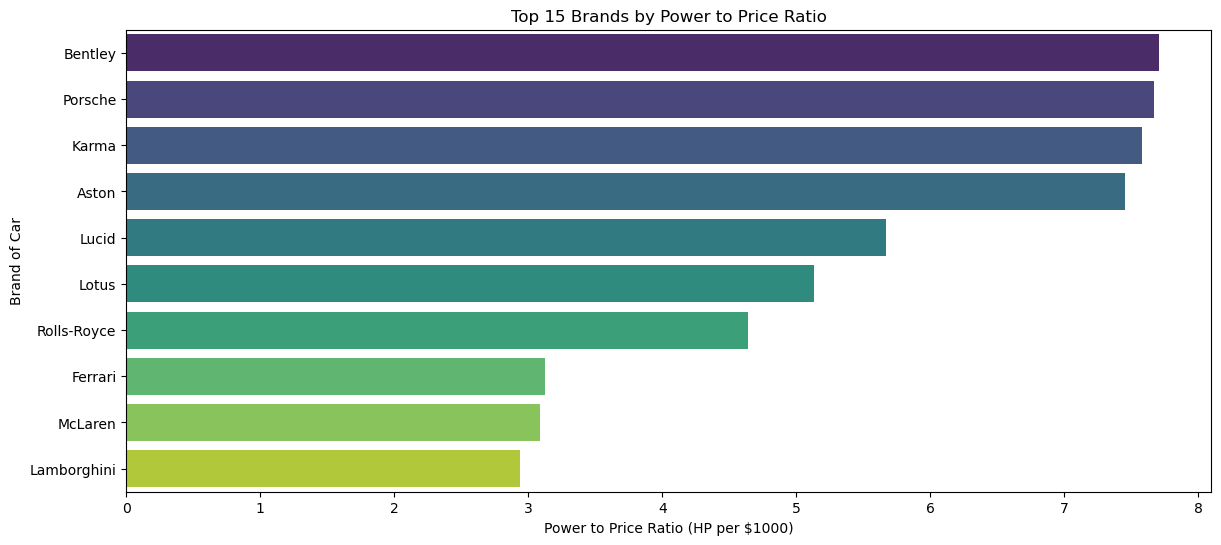

In [170]:
plt.figure(figsize=(14, 6))
sns.barplot(x='power_to_price', y='brand', data=lesser_brands, palette='viridis')
plt.xlabel('Power to Price Ratio (HP per $1000)')

plt.ylabel('Brand of Car')
plt.title('Top 15 Brands by Power to Price Ratio')

Q: What does the power-to-price ratio reveal about luxury brands compared to others?
A: From the bar chart showing the top and bottom 15 brands, we observed that luxury brands tend to offer a lower power-to-price ratio. This means that for every $1,000 spent, these brands generally deliver less horsepower, reflecting a premium cost for branding, design, and features rather than raw performance. In contrast, non-luxury and performance-focused brands often provide higher horsepower per dollar, offering better value in terms of engine power.

Model-Level Analysis

In [171]:
model_ratios = df_processed.groupby(['brand','model']).agg({'power_to_price':'mean','price_numeric $':'mean','engine_hp HP':'mean','milage_numeric':'mean','model_year':'mean'}).reset_index()


In [172]:
model_ratios_sorted = model_ratios.sort_values(by='power_to_price', ascending=False)
top_models = model_ratios_sorted.head(20)



/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/3489626643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models['power_to_price'], y=top_models['brand']+ ' '+top_models['model'],orient='h', palette='viridis')


Text(0.5, 1.0, 'Top 20 Models by Power to Price Ratio')

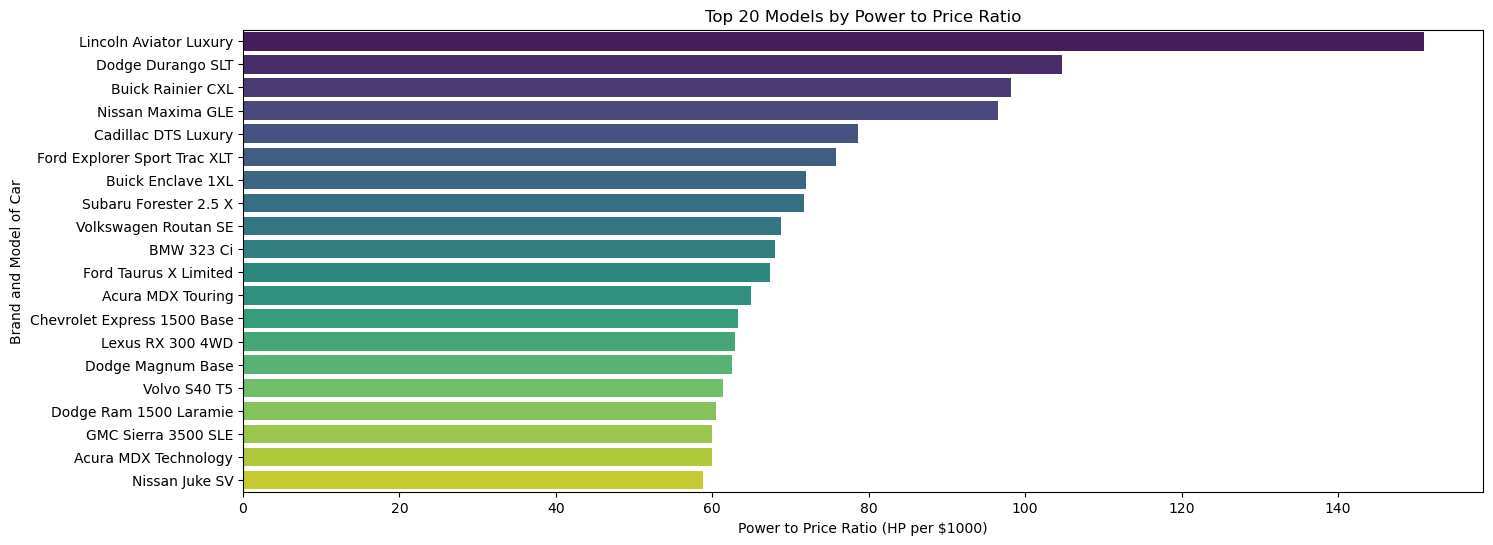

In [173]:
plt.figure(figsize=(16, 6))
sns.barplot(x=top_models['power_to_price'], y=top_models['brand']+ ' '+top_models['model'],orient='h', palette='viridis')
plt.xlabel('Power to Price Ratio (HP per $1000)')
plt.ylabel('Brand and Model of Car')
plt.title('Top 20 Models by Power to Price Ratio')
    
   

Age Group Analysis

In [174]:
age_analysis = df_processed.groupby('age_group').agg({'power_to_price':'mean','price_numeric $':'mean'}).reset_index()
age_analysis

/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/1176496551.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df_processed.groupby('age_group').agg({'power_to_price':'mean','price_numeric $':'mean'}).reset_index()


,age_group,power_to_price,price_numeric $
0,0-5 years,6.553564,66770.214979
1,6-10 years,10.733270,39812.610009
2,11-15 years,19.303024,21070.969027
3,16-20 years,24.513753,30757.745763
4,21-25 years,25.288789,14631.926316
5,26+ years,23.631500,12666.175000


/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/2476543576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='power_to_price', data=age_analysis, palette='viridis')


Text(0.5, 1.0, 'Average Power to Price Ratio by Vehicle Age Group')

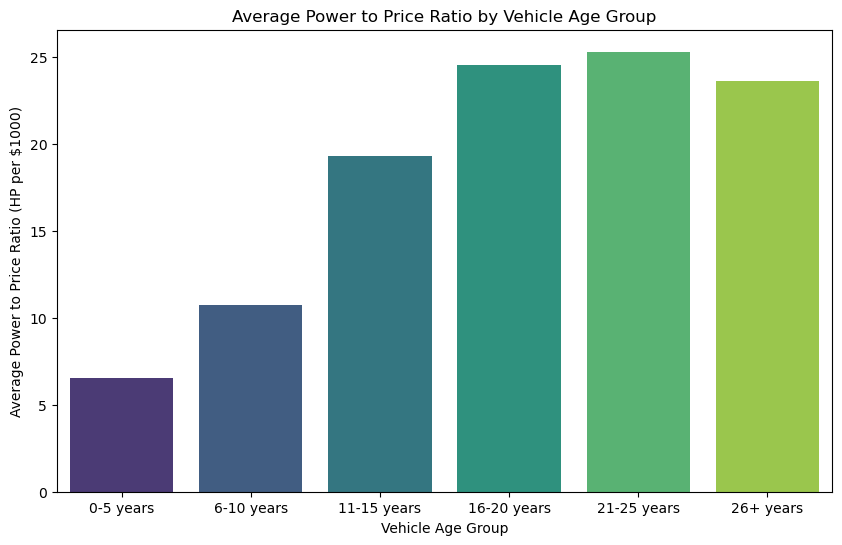

In [175]:
#plot the average power to price ratio by vehicle age group

plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='power_to_price', data=age_analysis, palette='viridis')
plt.xlabel('Vehicle Age Group')
plt.ylabel('Average Power to Price Ratio (HP per $1000)')
plt.title('Average Power to Price Ratio by Vehicle Age Group')

Create a scatter plot to visualize the relationship between price and engine horspower.

Text(0, 0.5, 'Price $')

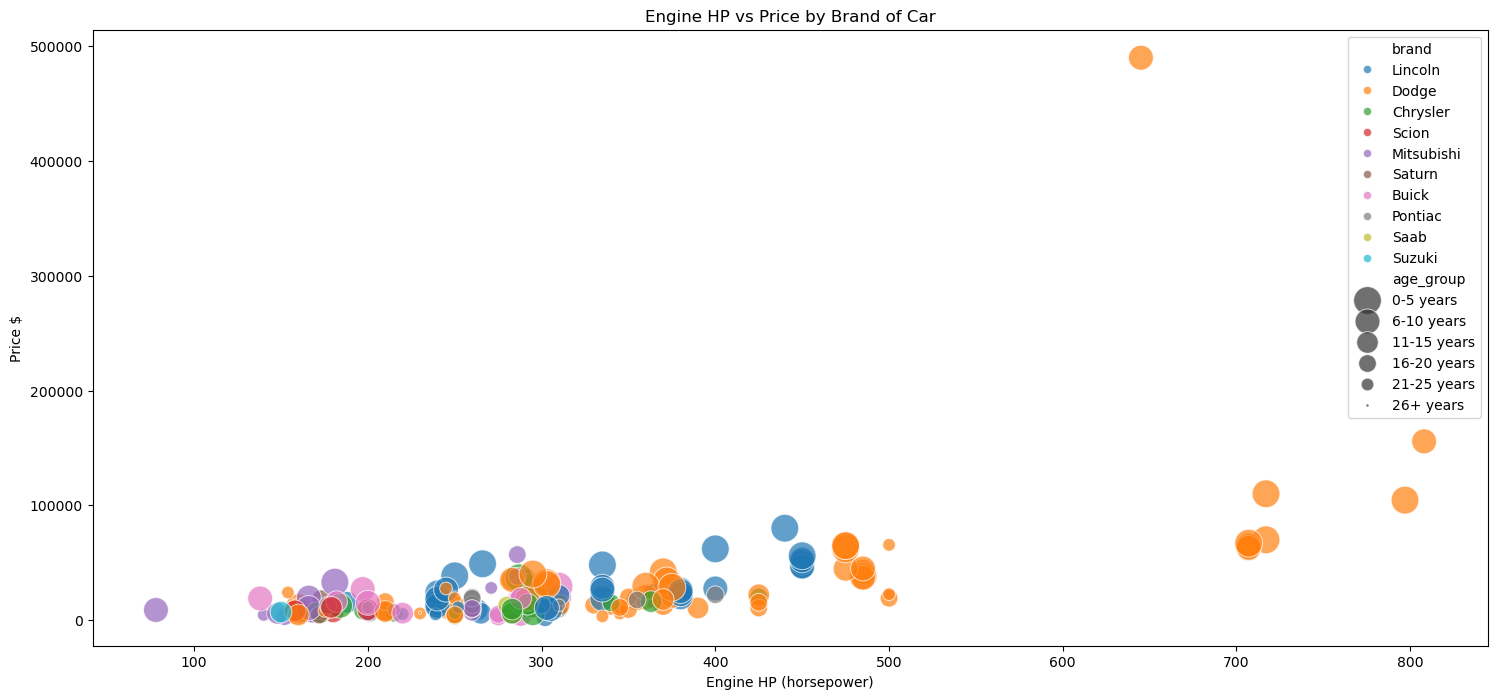

In [176]:
plt.figure(figsize=(18,8))
sns.scatterplot( x='engine_hp HP', y='price_numeric $', hue='brand' ,size='age_group',sizes=(5,400),alpha=0.7, data= df_processed[df_processed['brand'].isin(top_brands['brand'])])
plt.title('Engine HP vs Price by Brand of Car')
plt.xlabel('Engine HP (horsepower)')
plt.ylabel('Price $')


Analysis by Fuel Type

In [177]:
fuel_analysis = df_processed.groupby(['fuel_type','brand']).agg({'power_to_price':'mean'}).reset_index()

In [178]:
for fuel in df_processed['fuel_type'].unique():
    print(f"\nTOP 5 brands for {fuel} vehicles:")
    
    fuel_data = fuel_analysis[fuel_analysis['fuel_type'] == fuel]
    top_brands = fuel_data.sort_values('power_to_price', ascending=False).head(5)
    print(top_brands)


TOP 5 brands for E85 Flex Fuel vehicles:
        fuel_type      brand  power_to_price
15  E85 Flex Fuel   Chrysler       32.975000
19  E85 Flex Fuel       Jeep       25.030000
13  E85 Flex Fuel   Cadillac       24.402222
21  E85 Flex Fuel    Lincoln       23.105000
14  E85 Flex Fuel  Chevrolet       22.510333

TOP 5 brands for Hybrid vehicles:
   fuel_type      brand  power_to_price
95    Hybrid     Saturn       39.090000
88    Hybrid        Kia       18.235000
85    Hybrid   INFINITI       17.656667
81    Hybrid  Chevrolet       15.810000
82    Hybrid       Ford       12.141000

TOP 5 brands for Gasoline vehicles:
   fuel_type     brand  power_to_price
32  Gasoline     Buick       29.169333
35  Gasoline  Chrysler       27.155000
64  Gasoline   Pontiac       24.546667
68  Gasoline      Saab       24.475000
36  Gasoline     Dodge       22.241563

TOP 5 brands for nan vehicles:
Empty DataFrame
Columns: [fuel_type, brand, power_to_price]
Index: []

TOP 5 brands for Plug-In Hybrid vehicle

/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_63111/1715672526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel_type', y='power_to_price', data=fuel_analysis, palette='viridis')


Text(0.5, 1.0, 'Average Power to Price Ratio by Fuel Type')

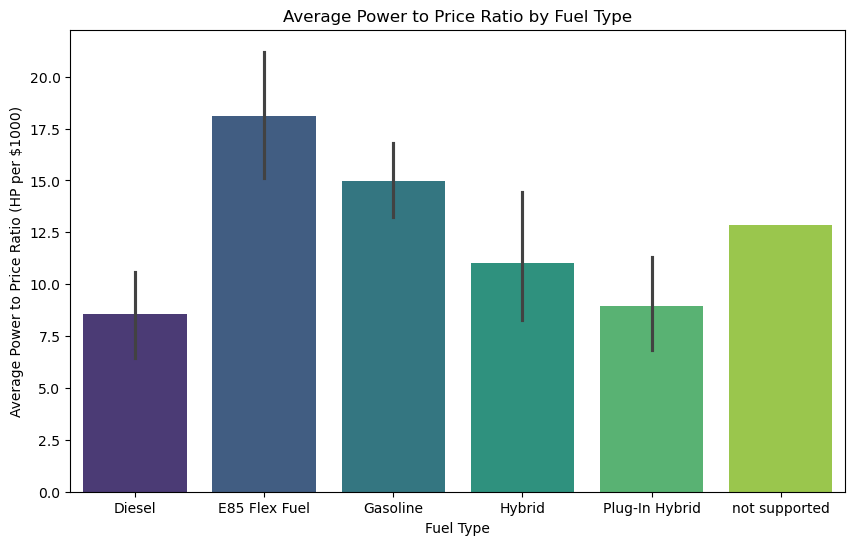

In [179]:

#plot the average power to price ratio by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='power_to_price', data=fuel_analysis, palette='viridis')
plt.xlabel('Fuel Type')
plt.ylabel('Average Power to Price Ratio (HP per $1000)')
plt.title('Average Power to Price Ratio by Fuel Type')